In [2]:
# Set working drive
setwd("~")

In [3]:
library(dplyr)
library(lubridate)
library(readxl)
library(tidyr)
library(openxlsx)
library(tidyverse)

Warning message:
"package 'dplyr' was built under R version 3.6.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'lubridate' was built under R version 3.6.3"
Attaching package: 'lubridate'

The following objects are masked from 'package:base':

    date, intersect, setdiff, union

Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'openxlsx' was built under R version 3.6.3"Warning message:
"package 'tidyverse' was built under R version 3.6.3"

ERROR: Error: package or namespace load failed for 'tidyverse' in loadNamespace(j <- i[[1L]], c(lib.loc, .libPaths()), versionCheck = vI[[j]]):
 namespace 'jsonlite' 1.6 is already loaded, but >= 1.7.2 is required


In [4]:
# Read in Uber data
uber <- read_excel("Uber_peru_2010.xlsx", 3) 
uber <- as.data.frame(uber)

Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"Coercing numeric to date J17449 / R17449C10"Warning message in read_fun(path = enc2native(normalizePath(path)), sheet_i = sheet, :
"NA inserted for impossible 1900-02-29 datetime"New names:
* `` -> ...29


In [6]:
# Check out data 
str(uber)

'data.frame':	23111 obs. of  29 variables:
 $ journey_id      : chr  "23a1406fc6a11d866e3c82f22eed4d4c" "dd2af4715d0dc16eded53afc0e243577" "dd91e131888064bf7df3ce08f3d4b4ad" "dd2af4715d0dc16eded53afc0e2466d0" ...
 $ user_id         : chr  "0e9af5bbf1edfe591b54ecdfd7e91e26" "a553c46e3a22fb9c326aeb3d72b3334e" "a553c46e3a22fb9c326aeb3d72b3334e" "a553c46e3a22fb9c326aeb3d72b3334e" ...
 $ driver_id       : chr  "583949a89a9ee17d19e3ca4f137b6b4c" NA NA NA ...
 $ taxi_id         : chr  "b12f4f09c783e29fe0d0ea624530db56" NA NA NA ...
 $ icon            : chr  "executive" "executive" "executive" "executive" ...
 $ start_type      : chr  "asap" "asap" "asap" "asap" ...
 $ start_at        : POSIXct, format: "2010-11-16 16:44:00" "2010-06-01 00:34:00" ...
 $ start_lat       : chr  "-12.139835359999999" "-12.13874817" "-12.12453079" "-12.13885117" ...
 $ start_lon       : chr  "-77.2355957" "-76.99536133" "-77.2780151" "-76.99530029" ...
 $ end_at          : POSIXct, format: "2010-11-16 17:29:00" "2

In [7]:
head(uber)

journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,...,price_duration,distance,duration,cost,cost_distance,cost_duration,source,driver_score,rider_score,...29
23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,-12.139835359999999,-77.2355957,2010-11-16 17:29:00,...,195,11331,234,0,0,0,iPhone,5,5,NA
dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NA,NA,executive,asap,2010-06-01 00:34:00,-12.13874817,-76.99536133,2010-06-01 00:37:00,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NA,NA,executive,asap,2010-05-31 05:01:00,-12.12453079,-77.2780151,2010-05-31 05:04:00,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NA,NA,executive,asap,2010-06-01 00:29:00,-12.13885117,-76.99530029,2010-06-01 00:32:00,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,-12.8995438,-76.92626953,2010-09-12 01:07:00,...,562,30270,715,6173,5756,417,iPhone,4,5,NA
2254715f0f569e3173ec61f16cbb8341,56772d544fdfa589a020a1ff894a86f7,baacf396f773709519bbde35a5eab861,baacf396f773709519bbde35a585d91b,executive,reserved,2010-08-10 13:00:00,-12.2241898,-77.10650635,2010-08-10 14:26:00,...,1001,29080,1201,5875,5175,700,iPhone,NA,4,NA


In [8]:
# Eliminate unwanted columns
uber <- uber %>% select(-c(journey_id, user_id, driver_id, taxi_id, driver_start_lat, driver_start_lon, currency, ...29))

In [9]:
# Check uber again
str(uber)

'data.frame':	23111 obs. of  21 variables:
 $ icon          : chr  "executive" "executive" "executive" "executive" ...
 $ start_type    : chr  "asap" "asap" "asap" "asap" ...
 $ start_at      : POSIXct, format: "2010-11-16 16:44:00" "2010-06-01 00:34:00" ...
 $ start_lat     : chr  "-12.139835359999999" "-12.13874817" "-12.12453079" "-12.13885117" ...
 $ start_lon     : chr  "-77.2355957" "-76.99536133" "-77.2780151" "-76.99530029" ...
 $ end_at        : POSIXct, format: "2010-11-16 17:29:00" "2010-06-01 00:37:00" ...
 $ end_lat       : chr  "-12.5537033" "-12.12465668" "-12.13883209" "-12.12458801" ...
 $ end_lon       : chr  "-77.413208" "-77.2886963" "-76.99530029" "-77.2896118" ...
 $ end_state     : chr  "drop off" "not found" "not found" "not found" ...
 $ arrived_at    : POSIXct, format: "2010-11-16 17:02:00" NA ...
 $ price         : num  3821 NA NA NA 8227 ...
 $ price_distance: num  3626 NA NA NA 7665 ...
 $ price_duration: num  195 NA NA NA 562 ...
 $ distance      : num  11

In [10]:
# Extracting from start and end datetimes using lubridate
uber <- uber %>%
  mutate(
    Start_Yr = year(`start_at`),
    Start_Mth = month(`start_at`),
    Start_Hr = hour(`start_at`)
  )

uber <- uber %>%
  mutate(
    End_Yr = year(`end_at`),
    End_Mth = month(`end_at`),
    End_Hr = hour(`end_at`)
  )

In [11]:
# Check uber data
str(uber)

'data.frame':	23111 obs. of  27 variables:
 $ icon          : chr  "executive" "executive" "executive" "executive" ...
 $ start_type    : chr  "asap" "asap" "asap" "asap" ...
 $ start_at      : POSIXct, format: "2010-11-16 16:44:00" "2010-06-01 00:34:00" ...
 $ start_lat     : chr  "-12.139835359999999" "-12.13874817" "-12.12453079" "-12.13885117" ...
 $ start_lon     : chr  "-77.2355957" "-76.99536133" "-77.2780151" "-76.99530029" ...
 $ end_at        : POSIXct, format: "2010-11-16 17:29:00" "2010-06-01 00:37:00" ...
 $ end_lat       : chr  "-12.5537033" "-12.12465668" "-12.13883209" "-12.12458801" ...
 $ end_lon       : chr  "-77.413208" "-77.2886963" "-76.99530029" "-77.2896118" ...
 $ end_state     : chr  "drop off" "not found" "not found" "not found" ...
 $ arrived_at    : POSIXct, format: "2010-11-16 17:02:00" NA ...
 $ price         : num  3821 NA NA NA 8227 ...
 $ price_distance: num  3626 NA NA NA 7665 ...
 $ price_duration: num  195 NA NA NA 562 ...
 $ distance      : num  11

In [12]:
# Import in 2010 Temperature records
Temp <- read_excel("Peru 2010 Temp.xlsx", 1) 
Temp <- as.data.frame(Temp)

In [13]:
# Check Temp
str(Temp)
head(Temp)

'data.frame':	12 obs. of  5 variables:
 $ Year   : num  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ Month  : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Min    : num  17 19 17 17 16 14 13 13 13 13 ...
 $ Average: num  24 24 24 23 22 20 19 18 19 19 ...
 $ Max    : num  27 27 27 27 26 24 23 22 22 22 ...


Year,Month,Min,Average,Max
2010,1,17,24,27
2010,2,19,24,27
2010,3,17,24,27
2010,4,17,23,27
2010,5,16,22,26
2010,6,14,20,24


In [14]:
# Tidy Temp 
Temp2 <- Temp %>% pivot_longer(c('Min', 'Average', 'Max'))%>% select(-Year) 

In [15]:
# Rename Temp columns
colnames(Temp2) <- c('Month', 'Time', 'Temp')

In [16]:
# Check Temp data
head(Temp2)

Month,Time,Temp
1,Min,17
1,Average,24
1,Max,27
2,Min,19
2,Average,24
2,Max,27


In [17]:
# Create variable for hours in Min, Max, Average in Uber
for (i in 1:nrow(uber)){
  if (between(uber$Start_Hr[i], 0, 7) | between(uber$Start_Hr[i], 22, 23)){
    uber$`Time`[i] <- 'Min'
  } else {
    if (between(uber$Start_Hr[i], 12, 17)){
      uber$`Time`[i] <- 'Max'
    } else {
      if (between(uber$Start_Hr[i], 8, 11) | between(uber$Start_Hr[i], 18, 21)){
        uber$`Time`[i] <- 'Average'
    
      } else {
        uber$`Time`[i] <- 'NA'      
      }
    }
  }
}

In [18]:
# Check uber data
head(uber)

icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,arrived_at,...,source,driver_score,rider_score,Start_Yr,Start_Mth,Start_Hr,End_Yr,End_Mth,End_Hr,Time
executive,asap,2010-11-16 16:44:00,-12.139835359999999,-77.2355957,2010-11-16 17:29:00,-12.5537033,-77.413208,drop off,2010-11-16 17:02:00,...,iPhone,5,5,2010,11,16,2010,11,17,Max
executive,asap,2010-06-01 00:34:00,-12.13874817,-76.99536133,2010-06-01 00:37:00,-12.12465668,-77.2886963,not found,NA,...,NA,NA,NA,2010,6,0,2010,6,0,Min
executive,asap,2010-05-31 05:01:00,-12.12453079,-77.2780151,2010-05-31 05:04:00,-12.13883209,-76.99530029,not found,NA,...,NA,NA,NA,2010,5,5,2010,5,5,Min
executive,asap,2010-06-01 00:29:00,-12.13885117,-76.99530029,2010-06-01 00:32:00,-12.12458801,-77.2896118,not found,NA,...,NA,NA,NA,2010,6,0,2010,6,0,Min
executive,reserved,2010-09-11 23:55:00,-12.8995438,-76.92626953,2010-09-12 01:07:00,-12.2223206,-77.10638428,drop off,2010-09-11 23:50:00,...,iPhone,4,5,2010,9,23,2010,9,1,Min
executive,reserved,2010-08-10 13:00:00,-12.2241898,-77.10650635,2010-08-10 14:26:00,-12.8980179,-76.92608643,drop off,2010-08-10 12:53:00,...,iPhone,NA,4,2010,8,13,2010,8,14,Max


In [19]:
# Lookup temperature in Temp2 table and merge into uber
M <- merge(uber, Temp2, by.x = c("Start_Mth", "Time"), by.y = c("Month", "Time"), all.x = TRUE, all.y = FALSE)

In [20]:
# Check merged uber - Temp data
head(M)

Start_Mth,Time,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,...,cost_duration,source,driver_score,rider_score,Start_Yr,Start_Hr,End_Yr,End_Mth,End_Hr,Temp
1,Average,executive,asap,2010-01-26 21:32:00,-12.782739,-76.59016,2010-01-26 21:35:00,-12.795586,-76.574466,...,NA,NA,NA,NA,2010,21,2010,1,21,24
1,Average,executive,asap,2010-01-16 18:58:00,-12.974,-77.35153,2010-01-16 19:13:00,-12.93065,-77.25882,...,137,Android,0,5,2010,18,2010,1,19,24
1,Average,executive,asap,2010-01-15 20:26:00,-12.97484,-77.18294,2010-01-15 20:46:00,-12.97272,-77.32539,...,187,Android,NA,5,2010,20,2010,1,20,24
1,Average,executive,asap,2010-01-16 18:07:00,-12.634552,-76.969549,2010-01-16 18:56:00,-12.981579,-77.40235,...,367,web,NA,5,2010,18,2010,1,18,24
1,Average,executive,reserved,2010-01-12 08:00:00,-12.10525894,-77.4092407,2010-01-12 08:23:00,-12.2166367,-77.11416626,...,164,iPhone,5,5,2010,8,2010,1,8,24
1,Average,executive,reserved,2010-01-06 09:00:00,-12.7312393,-76.95724487,2010-01-06 09:04:00,-12.,.98040771,...,47,iPhone,NA,5,2010,9,2010,1,9,24


In [21]:
# Calculate travel time in seconds
M$Interval <- interval(M$`start_at`,M$`end_at`)
M$Travel <- int_length(M$Interval) # Interval in seconds

In [22]:
# Check M
head(M)

Start_Mth,Time,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,...,driver_score,rider_score,Start_Yr,Start_Hr,End_Yr,End_Mth,End_Hr,Temp,Interval,Travel
1,Average,executive,asap,2010-01-26 21:32:00,-12.782739,-76.59016,2010-01-26 21:35:00,-12.795586,-76.574466,...,NA,NA,2010,21,2010,1,21,24,2010-01-26 21:32:00 UTC--2010-01-26 21:35:00 UTC,180
1,Average,executive,asap,2010-01-16 18:58:00,-12.974,-77.35153,2010-01-16 19:13:00,-12.93065,-77.25882,...,0,5,2010,18,2010,1,19,24,2010-01-16 18:58:00 UTC--2010-01-16 19:13:00 UTC,900
1,Average,executive,asap,2010-01-15 20:26:00,-12.97484,-77.18294,2010-01-15 20:46:00,-12.97272,-77.32539,...,NA,5,2010,20,2010,1,20,24,2010-01-15 20:26:00 UTC--2010-01-15 20:46:00 UTC,1200
1,Average,executive,asap,2010-01-16 18:07:00,-12.634552,-76.969549,2010-01-16 18:56:00,-12.981579,-77.40235,...,NA,5,2010,18,2010,1,18,24,2010-01-16 18:07:00 UTC--2010-01-16 18:56:00 UTC,2940
1,Average,executive,reserved,2010-01-12 08:00:00,-12.10525894,-77.4092407,2010-01-12 08:23:00,-12.2166367,-77.11416626,...,5,5,2010,8,2010,1,8,24,2010-01-12 08:00:00 UTC--2010-01-12 08:23:00 UTC,1380
1,Average,executive,reserved,2010-01-06 09:00:00,-12.7312393,-76.95724487,2010-01-06 09:04:00,-12.,.98040771,...,NA,5,2010,9,2010,1,9,24,2010-01-06 09:00:00 UTC--2010-01-06 09:04:00 UTC,240


In [23]:
# Check for NAs
colSums(is.na(M))

Start_Mth           Time           icon     start_type       start_at 
             0              0              0              0              0 
     start_lat      start_lon         end_at        end_lat        end_lon 
             0              0            277              0              0 
     end_state     arrived_at          price price_distance price_duration 
            18           6136           4282           5476           5476 
      distance       duration           cost  cost_distance  cost_duration 
          4158           4158           5225           7310           7310 
        source   driver_score    rider_score       Start_Yr       Start_Hr 
          4266          15606           8352              0              0 
        End_Yr        End_Mth         End_Hr           Temp       Interval 
           277            277            277              0            277 
        Travel 
           277

In [24]:
# Filter NAs in Travel
 M <- M %>% filter(is.na(Travel) == F)

In [25]:
# Check filtered data
colSums(is.na(M))
head(M)

Start_Mth           Time           icon     start_type       start_at 
             0              0              0              0              0 
     start_lat      start_lon         end_at        end_lat        end_lon 
             0              0              0              0              0 
     end_state     arrived_at          price price_distance price_duration 
             6           5860           4006           5202           5202 
      distance       duration           cost  cost_distance  cost_duration 
          3885           3885           4949           7035           7035 
        source   driver_score    rider_score       Start_Yr       Start_Hr 
          3993          15330           8076              0              0 
        End_Yr        End_Mth         End_Hr           Temp       Interval 
             0              0              0              0              0 
        Travel 
             0

Start_Mth,Time,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,...,driver_score,rider_score,Start_Yr,Start_Hr,End_Yr,End_Mth,End_Hr,Temp,Interval,Travel
1,Average,executive,asap,2010-01-26 21:32:00,-12.782739,-76.59016,2010-01-26 21:35:00,-12.795586,-76.574466,...,NA,NA,2010,21,2010,1,21,24,2010-01-26 21:32:00 UTC--2010-01-26 21:35:00 UTC,180
1,Average,executive,asap,2010-01-16 18:58:00,-12.974,-77.35153,2010-01-16 19:13:00,-12.93065,-77.25882,...,0,5,2010,18,2010,1,19,24,2010-01-16 18:58:00 UTC--2010-01-16 19:13:00 UTC,900
1,Average,executive,asap,2010-01-15 20:26:00,-12.97484,-77.18294,2010-01-15 20:46:00,-12.97272,-77.32539,...,NA,5,2010,20,2010,1,20,24,2010-01-15 20:26:00 UTC--2010-01-15 20:46:00 UTC,1200
1,Average,executive,asap,2010-01-16 18:07:00,-12.634552,-76.969549,2010-01-16 18:56:00,-12.981579,-77.40235,...,NA,5,2010,18,2010,1,18,24,2010-01-16 18:07:00 UTC--2010-01-16 18:56:00 UTC,2940
1,Average,executive,reserved,2010-01-12 08:00:00,-12.10525894,-77.4092407,2010-01-12 08:23:00,-12.2166367,-77.11416626,...,5,5,2010,8,2010,1,8,24,2010-01-12 08:00:00 UTC--2010-01-12 08:23:00 UTC,1380
1,Average,executive,reserved,2010-01-06 09:00:00,-12.7312393,-76.95724487,2010-01-06 09:04:00,-12.,.98040771,...,NA,5,2010,9,2010,1,9,24,2010-01-06 09:00:00 UTC--2010-01-06 09:04:00 UTC,240


In [26]:
# Convert Travel time from seconds to hour
M$TravelHr <- round(M$Travel/3600, 2)

In [27]:
# Check TravelHr variable
head(M)

Start_Mth,Time,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,...,rider_score,Start_Yr,Start_Hr,End_Yr,End_Mth,End_Hr,Temp,Interval,Travel,TravelHr
1,Average,executive,asap,2010-01-26 21:32:00,-12.782739,-76.59016,2010-01-26 21:35:00,-12.795586,-76.574466,...,NA,2010,21,2010,1,21,24,2010-01-26 21:32:00 UTC--2010-01-26 21:35:00 UTC,180,0.05
1,Average,executive,asap,2010-01-16 18:58:00,-12.974,-77.35153,2010-01-16 19:13:00,-12.93065,-77.25882,...,5,2010,18,2010,1,19,24,2010-01-16 18:58:00 UTC--2010-01-16 19:13:00 UTC,900,0.25
1,Average,executive,asap,2010-01-15 20:26:00,-12.97484,-77.18294,2010-01-15 20:46:00,-12.97272,-77.32539,...,5,2010,20,2010,1,20,24,2010-01-15 20:26:00 UTC--2010-01-15 20:46:00 UTC,1200,0.33
1,Average,executive,asap,2010-01-16 18:07:00,-12.634552,-76.969549,2010-01-16 18:56:00,-12.981579,-77.40235,...,5,2010,18,2010,1,18,24,2010-01-16 18:07:00 UTC--2010-01-16 18:56:00 UTC,2940,0.82
1,Average,executive,reserved,2010-01-12 08:00:00,-12.10525894,-77.4092407,2010-01-12 08:23:00,-12.2166367,-77.11416626,...,5,2010,8,2010,1,8,24,2010-01-12 08:00:00 UTC--2010-01-12 08:23:00 UTC,1380,0.38
1,Average,executive,reserved,2010-01-06 09:00:00,-12.7312393,-76.95724487,2010-01-06 09:04:00,-12.,.98040771,...,5,2010,9,2010,1,9,24,2010-01-06 09:00:00 UTC--2010-01-06 09:04:00 UTC,240,0.07


In [28]:
install.packages("geosphere")
library(geosphere)
library(ggplot2)

package 'geosphere' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mlene\AppData\Local\Temp\RtmpQv8n1B\downloaded_packages


Warning message:
"package 'geosphere' was built under R version 3.6.3"Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message in (function (kind = NULL, normal.kind = NULL, sample.kind = NULL) :
"non-uniform 'Rounding' sampler used"

In [29]:
# Calculate distance latitude longitude (non-numeric)
# The shortest distance between two points (i.e., the 'great-circle-distance' or 'as the crow flies'), 
# according to the 'haversine method'. 
# This method assumes a spherical earth, ignoring ellipsoidal effects.
M$distHaversine <- round(distHaversine(M[,c("start_lon", "start_lat")], M[,c("end_lon", "end_lat")])/1000, 3)

# Error in .pointsToMatrix(p1) : latitude < -90

ERROR: Error in .pointsToMatrix(p1): latitude < -90


In [30]:
# Convert Longitudes and Latitudes to numeric
M[6:7] <- lapply(M[6:7], as.numeric)
M[9:10] <- lapply(M[9:10], as.numeric)
colSums(is.na(M))

Warning message in lapply(M[9:10], as.numeric):
"NAs introduced by coercion"

Start_Mth           Time           icon     start_type       start_at 
             0              0              0              0              0 
     start_lat      start_lon         end_at        end_lat        end_lon 
             0              0              0              0              5 
     end_state     arrived_at          price price_distance price_duration 
             6           5860           4006           5202           5202 
      distance       duration           cost  cost_distance  cost_duration 
          3885           3885           4949           7035           7035 
        source   driver_score    rider_score       Start_Yr       Start_Hr 
          3993          15330           8076              0              0 
        End_Yr        End_Mth         End_Hr           Temp       Interval 
             0              0              0              0              0 
        Travel       TravelHr 
             0              0

In [31]:
# Calculate distance latitude longitude
M$distHaversine <- round(distHaversine(M[,c("start_lon", "start_lat")], M[,c("end_lon", "end_lat")])/1000, 3)

In [32]:
# Using distVincentyEllipsoid = uses an ellipsoid in meters by default
M$distVincentyEllipsoid <- round(distVincentyEllipsoid(M[,c("start_lon", "start_lat")], M[,c("end_lon", "end_lat")])/1000, 3)

In [33]:
# Using distGeo: Distance on an ellipsoid (the geodesic) Highly accurate estimate of the shortest distance between two points on an ellipsoid
M$distGeo <- round(distGeo(M[,c("start_lon", "start_lat")], M[,c("end_lon", "end_lat")], a=6378137, f=1/298.257223563)/1000, 3)

In [34]:
head(M)

Start_Mth,Time,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,...,End_Yr,End_Mth,End_Hr,Temp,Interval,Travel,TravelHr,distHaversine,distVincentyEllipsoid,distGeo
1,Average,executive,asap,2010-01-26 21:32:00,-12.78274,-76.59016,2010-01-26 21:35:00,-12.79559,-76.5744660,...,2010,1,21,24,2010-01-26 21:32:00 UTC--2010-01-26 21:35:00 UTC,180,0.05,2.224,2.219,2.219
1,Average,executive,asap,2010-01-16 18:58:00,-12.97400,-77.35153,2010-01-16 19:13:00,-12.93065,-77.2588200,...,2010,1,19,24,2010-01-16 18:58:00 UTC--2010-01-16 19:13:00 UTC,900,0.25,11.156,11.144,11.144
1,Average,executive,asap,2010-01-15 20:26:00,-12.97484,-77.18294,2010-01-15 20:46:00,-12.97272,-77.3253900,...,2010,1,20,24,2010-01-15 20:26:00 UTC--2010-01-15 20:46:00 UTC,1200,0.33,15.454,15.457,15.457
1,Average,executive,asap,2010-01-16 18:07:00,-12.63455,-76.96955,2010-01-16 18:56:00,-12.98158,-77.4023500,...,2010,1,18,24,2010-01-16 18:07:00 UTC--2010-01-16 18:56:00 UTC,2940,0.82,60.823,60.678,60.678
1,Average,executive,reserved,2010-01-12 08:00:00,-12.10526,-77.40924,2010-01-12 08:23:00,-12.21664,-77.1141663,...,2010,1,8,24,2010-01-12 08:00:00 UTC--2010-01-12 08:23:00 UTC,1380,0.38,34.421,34.398,34.398
1,Average,executive,reserved,2010-01-06 09:00:00,-12.73124,-76.95724,2010-01-06 09:04:00,-12.00000,0.9804077,...,2010,1,9,24,2010-01-06 09:00:00 UTC--2010-01-06 09:04:00 UTC,240,0.07,8438.704,8439.946,8439.946


In [35]:
# Calculate Driver Average speed 
M$AveSpeed <- round(M$distVincentyEllipsoid/M$TravelHr, 3)

In [36]:
head(M)

Start_Mth,Time,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,...,End_Mth,End_Hr,Temp,Interval,Travel,TravelHr,distHaversine,distVincentyEllipsoid,distGeo,AveSpeed
1,Average,executive,asap,2010-01-26 21:32:00,-12.78274,-76.59016,2010-01-26 21:35:00,-12.79559,-76.5744660,...,1,21,24,2010-01-26 21:32:00 UTC--2010-01-26 21:35:00 UTC,180,0.05,2.224,2.219,2.219,44.380
1,Average,executive,asap,2010-01-16 18:58:00,-12.97400,-77.35153,2010-01-16 19:13:00,-12.93065,-77.2588200,...,1,19,24,2010-01-16 18:58:00 UTC--2010-01-16 19:13:00 UTC,900,0.25,11.156,11.144,11.144,44.576
1,Average,executive,asap,2010-01-15 20:26:00,-12.97484,-77.18294,2010-01-15 20:46:00,-12.97272,-77.3253900,...,1,20,24,2010-01-15 20:26:00 UTC--2010-01-15 20:46:00 UTC,1200,0.33,15.454,15.457,15.457,46.839
1,Average,executive,asap,2010-01-16 18:07:00,-12.63455,-76.96955,2010-01-16 18:56:00,-12.98158,-77.4023500,...,1,18,24,2010-01-16 18:07:00 UTC--2010-01-16 18:56:00 UTC,2940,0.82,60.823,60.678,60.678,73.998
1,Average,executive,reserved,2010-01-12 08:00:00,-12.10526,-77.40924,2010-01-12 08:23:00,-12.21664,-77.1141663,...,1,8,24,2010-01-12 08:00:00 UTC--2010-01-12 08:23:00 UTC,1380,0.38,34.421,34.398,34.398,90.521
1,Average,executive,reserved,2010-01-06 09:00:00,-12.73124,-76.95724,2010-01-06 09:04:00,-12.00000,0.9804077,...,1,9,24,2010-01-06 09:00:00 UTC--2010-01-06 09:04:00 UTC,240,0.07,8438.704,8439.946,8439.946,120570.657


In [37]:
str(M)

'data.frame':	22834 obs. of  36 variables:
 $ Start_Mth            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Time                 : chr  "Average" "Average" "Average" "Average" ...
 $ icon                 : chr  "executive" "executive" "executive" "executive" ...
 $ start_type           : chr  "asap" "asap" "asap" "asap" ...
 $ start_at             : POSIXct, format: "2010-01-26 21:32:00" "2010-01-16 18:58:00" ...
 $ start_lat            : num  -12.8 -13 -13 -12.6 -12.1 ...
 $ start_lon            : num  -76.6 -77.4 -77.2 -77 -77.4 ...
 $ end_at               : POSIXct, format: "2010-01-26 21:35:00" "2010-01-16 19:13:00" ...
 $ end_lat              : num  -12.8 -12.9 -13 -13 -12.2 ...
 $ end_lon              : num  -76.6 -77.3 -77.3 -77.4 -77.1 ...
 $ end_state            : chr  "not found" "drop off" "drop off" "drop off" ...
 $ arrived_at           : POSIXct, format: NA "2010-01-16 19:05:00" ...
 $ price                : num  NA 1700 1628 3909 5023 ...
 $ price_distance       : num  NA 436 4

In [38]:
# Drop NA from all variables
M2 <- drop_na(M)
colSums(is.na(M2))
str(M2) #6400 obs

Start_Mth                  Time                  icon 
                    0                     0                     0 
           start_type              start_at             start_lat 
                    0                     0                     0 
            start_lon                end_at               end_lat 
                    0                     0                     0 
              end_lon             end_state            arrived_at 
                    0                     0                     0 
                price        price_distance        price_duration 
                    0                     0                     0 
             distance              duration                  cost 
                    0                     0                     0 
        cost_distance         cost_duration                source 
                    0                     0                     0 
         driver_score           rider_score              Start_Yr 
                    0                     0                     0 
             Start_Hr                End_Yr               End_Mth 
                    0                     0                     0 
               End_Hr                  Temp              Interval 
                    0                     0                     0 
               Travel              TravelHr         distHaversine 
                    0                     0                     0 
distVincentyEllipsoid               distGeo              AveSpeed 
                    0                     0                     0

'data.frame':	6470 obs. of  36 variables:
 $ Start_Mth            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Time                 : chr  "Average" "Average" "Average" "Average" ...
 $ icon                 : chr  "executive" "executive" "executive" "executive" ...
 $ start_type           : chr  "asap" "reserved" "asap" "asap" ...
 $ start_at             : POSIXct, format: "2010-01-16 18:58:00" "2010-01-12 08:00:00" ...
 $ start_lat            : num  -13 -12.1 -12.1 -12.1 -12.1 ...
 $ start_lon            : num  -77.4 -77.4 -77.2 -77 -77.2 ...
 $ end_at               : POSIXct, format: "2010-01-16 19:13:00" "2010-01-12 08:23:00" ...
 $ end_lat              : num  -12.9 -12.2 -12 -12 -12 ...
 $ end_lon              : num  -77.259 -77.114 0.387 0.186 0.255 ...
 $ end_state            : chr  "drop off" "drop off" "drop off" "drop off" ...
 $ arrived_at           : POSIXct, format: "2010-01-16 19:05:00" "2010-01-12 07:48:00" ...
 $ price                : num  1700 5023 2200 2507 4761 ...
 $ price_dis

In [ ]:
# The goal of tidyr is to help you create tidy data. Tidy data is data where:

# Every column is variable.
# Every row is an observation.
# Every cell is a single value.

In [39]:
# Filter and retain only dropoff end_state
M2 <- M2 %>% filter(end_state == "drop off")
str(M2)

'data.frame':	6470 obs. of  36 variables:
 $ Start_Mth            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Time                 : chr  "Average" "Average" "Average" "Average" ...
 $ icon                 : chr  "executive" "executive" "executive" "executive" ...
 $ start_type           : chr  "asap" "reserved" "asap" "asap" ...
 $ start_at             : POSIXct, format: "2010-01-16 18:58:00" "2010-01-12 08:00:00" ...
 $ start_lat            : num  -13 -12.1 -12.1 -12.1 -12.1 ...
 $ start_lon            : num  -77.4 -77.4 -77.2 -77 -77.2 ...
 $ end_at               : POSIXct, format: "2010-01-16 19:13:00" "2010-01-12 08:23:00" ...
 $ end_lat              : num  -12.9 -12.2 -12 -12 -12 ...
 $ end_lon              : num  -77.259 -77.114 0.387 0.186 0.255 ...
 $ end_state            : chr  "drop off" "drop off" "drop off" "drop off" ...
 $ arrived_at           : POSIXct, format: "2010-01-16 19:05:00" "2010-01-12 07:48:00" ...
 $ price                : num  1700 5023 2200 2507 4761 ...
 $ price_dis

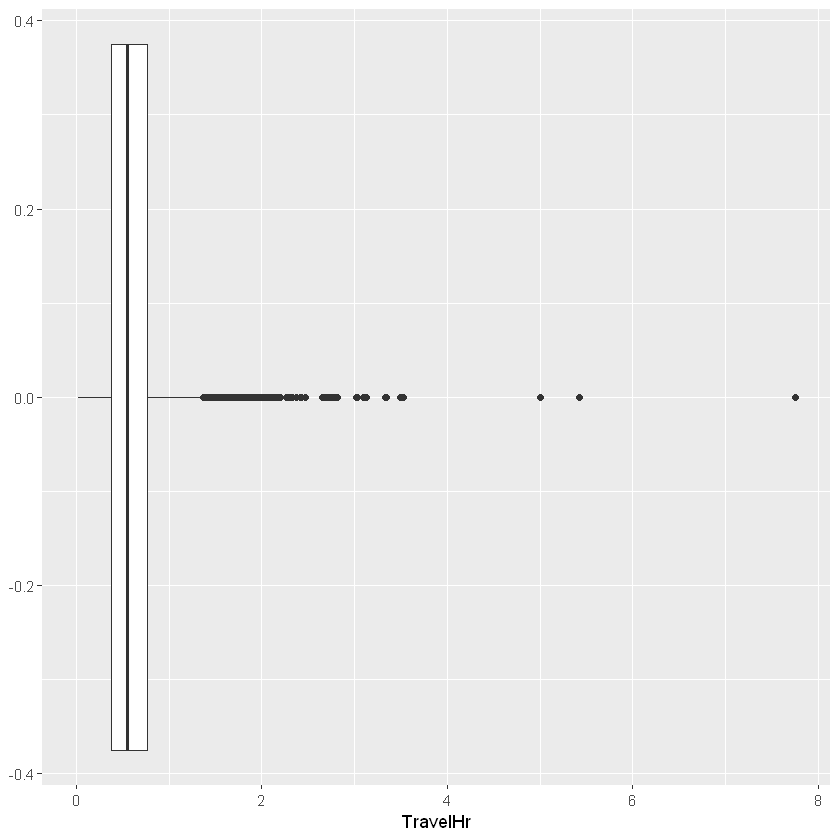

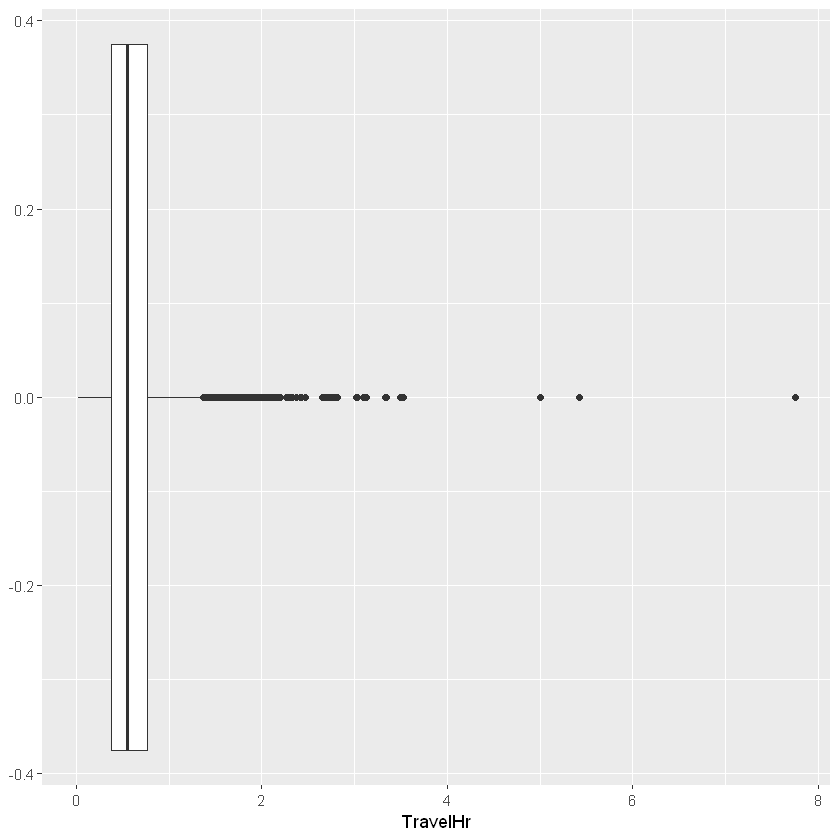

In [40]:
# Create boxplot for TravelHr variable
M2 %>% filter(TravelHr > 0 & TravelHr < 20) %>% ggplot(aes(x = TravelHr)) + geom_boxplot() 
M2 %>% filter(TravelHr > 0 & TravelHr < 10) %>% ggplot(aes(x = TravelHr)) + geom_boxplot() #Cap at 10 hr 

In [41]:
# Cap TravelHr at less than 2 Hr
M3 <- M2 %>% filter(TravelHr > 0 & TravelHr < 2) 
str(M3) #6300 obs

'data.frame':	6357 obs. of  36 variables:
 $ Start_Mth            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Time                 : chr  "Average" "Average" "Average" "Average" ...
 $ icon                 : chr  "executive" "executive" "executive" "executive" ...
 $ start_type           : chr  "asap" "reserved" "asap" "asap" ...
 $ start_at             : POSIXct, format: "2010-01-16 18:58:00" "2010-01-12 08:00:00" ...
 $ start_lat            : num  -13 -12.1 -12.1 -12.1 -12.1 ...
 $ start_lon            : num  -77.4 -77.4 -77.2 -77 -77.2 ...
 $ end_at               : POSIXct, format: "2010-01-16 19:13:00" "2010-01-12 08:23:00" ...
 $ end_lat              : num  -12.9 -12.2 -12 -12 -12 ...
 $ end_lon              : num  -77.259 -77.114 0.387 0.186 0.255 ...
 $ end_state            : chr  "drop off" "drop off" "drop off" "drop off" ...
 $ arrived_at           : POSIXct, format: "2010-01-16 19:05:00" "2010-01-12 07:48:00" ...
 $ price                : num  1700 5023 2200 2507 4761 ...
 $ price_dis

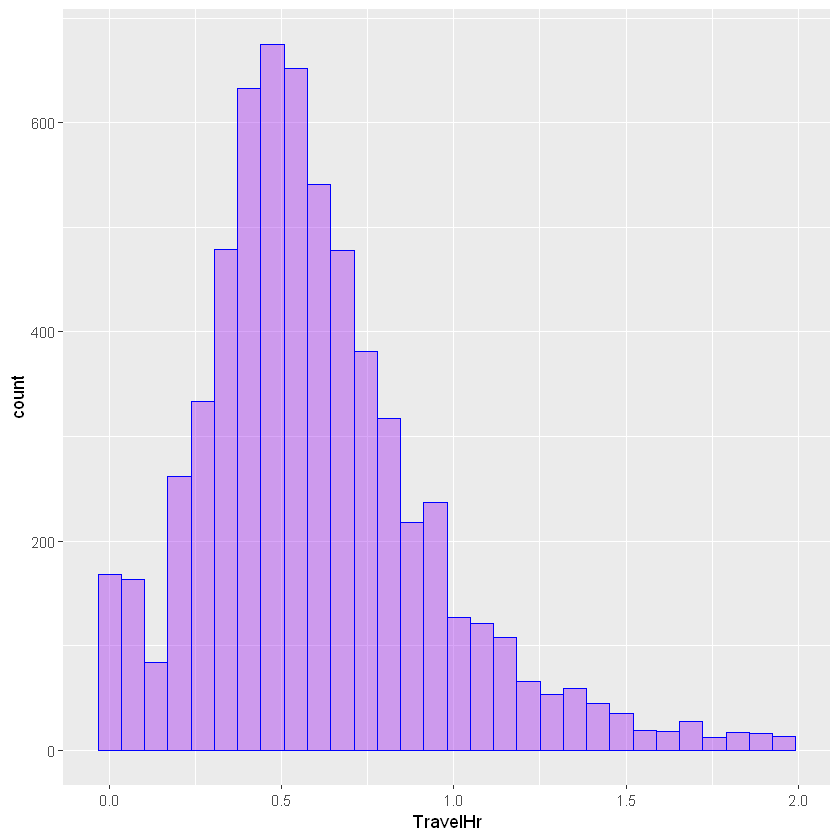

In [42]:
# Create histogram for TravelHr variable
M3 %>% ggplot(aes(x = TravelHr)) + geom_histogram(bins = 30, fill = 'purple', color = 'blue', alpha = 0.4) #Median is ~0.5hr

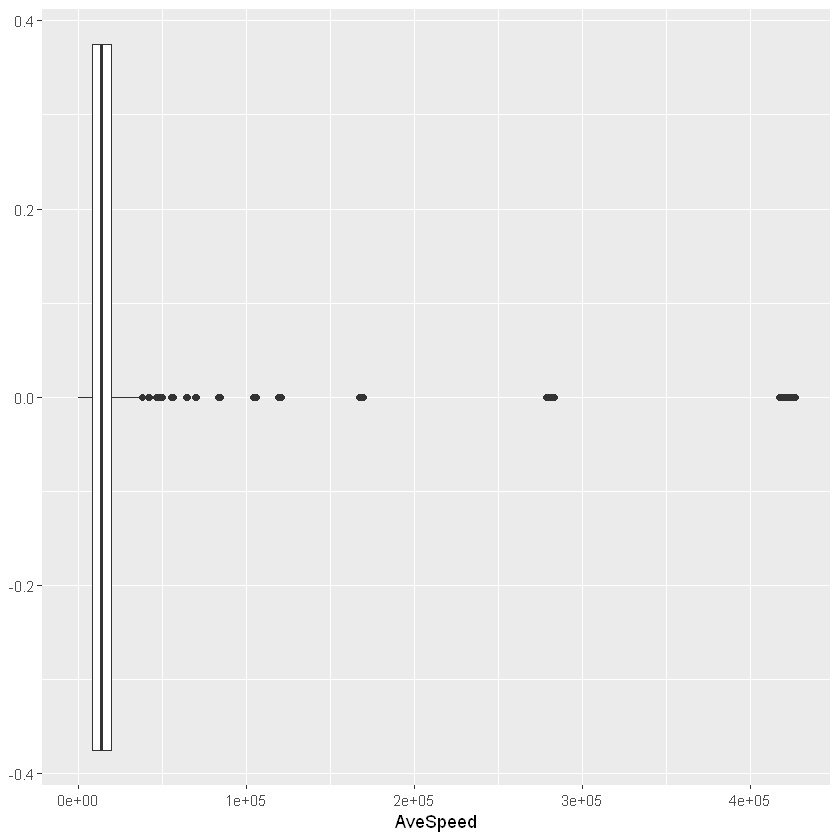

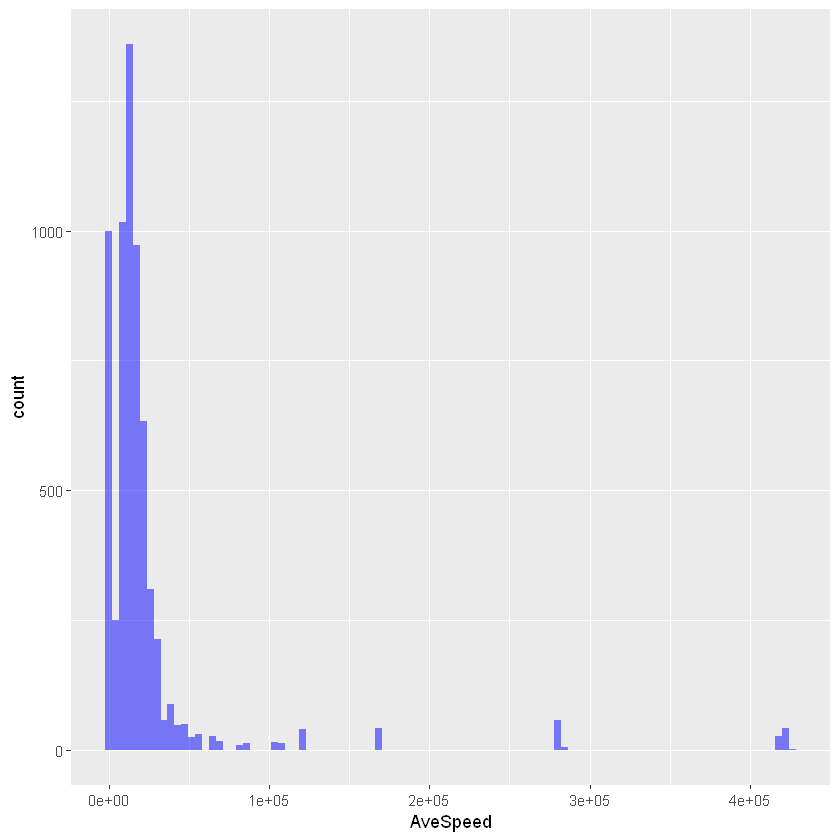

In [43]:
#Question: Looking at distribution of Average speeds and its median
M3 %>% ggplot(aes(x = AveSpeed)) + geom_boxplot()
M3 %>% ggplot(aes(x = AveSpeed)) + geom_histogram(bins = 100, fill = "blue", alpha = 0.5)

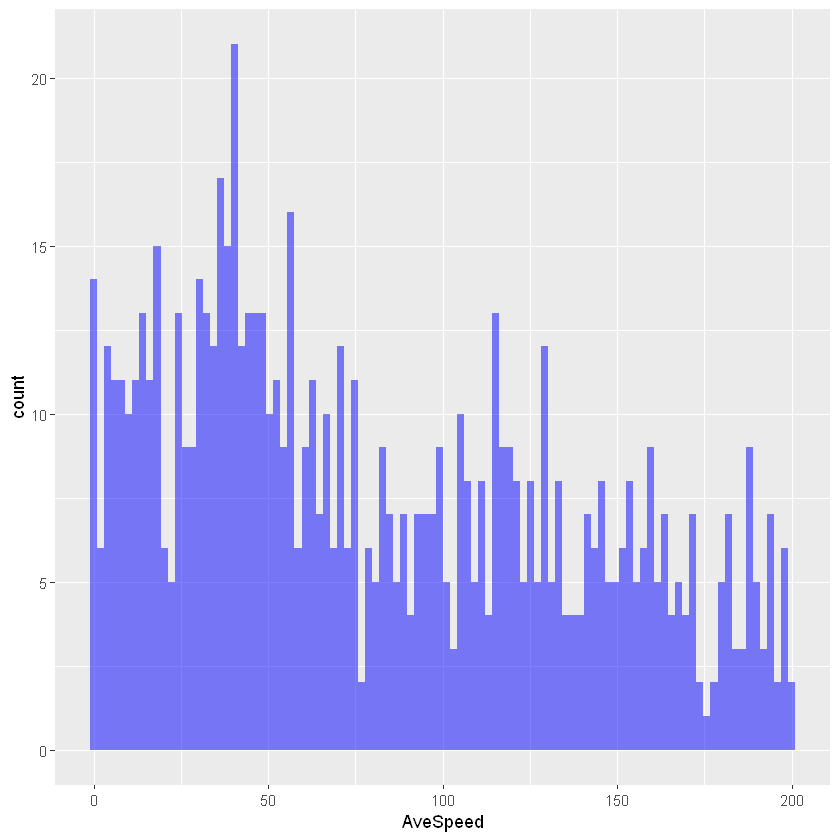

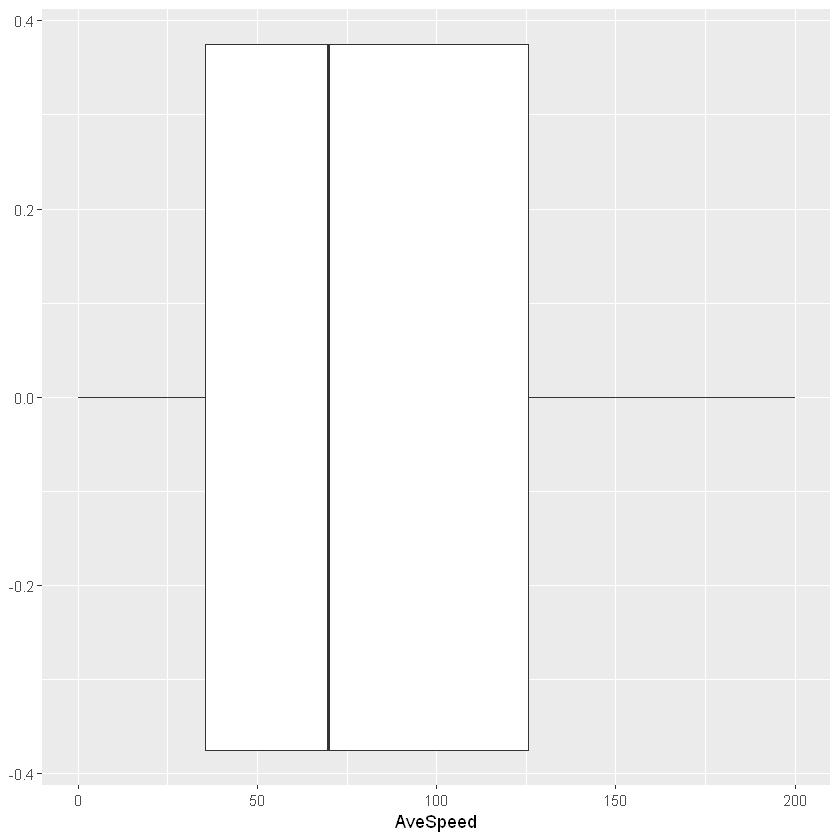

In [44]:
M3 %>% filter(AveSpeed < 200) %>% ggplot(aes(x = AveSpeed)) + geom_histogram(bins = 100, fill = "blue", alpha = 0.5)
M3 %>% filter(AveSpeed < 200) %>% ggplot(aes(x = AveSpeed)) + geom_boxplot() #Median is around 60/70 kmh

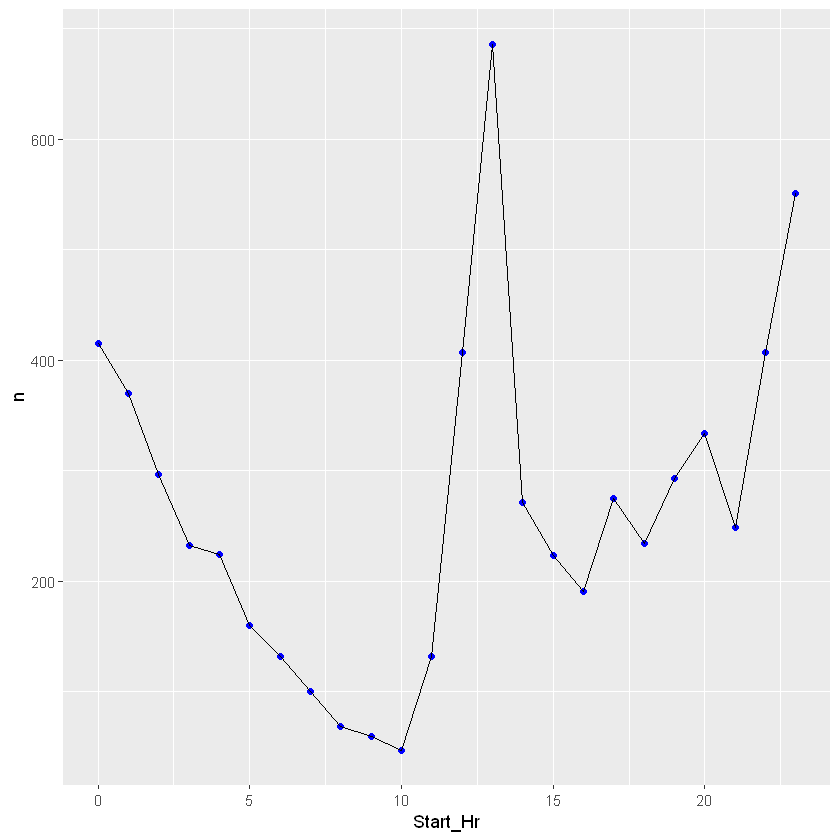

In [45]:
#Question: Number of trips by the hour of the day
M4 <- M3 %>% count(Start_Hr)
M4 %>% ggplot(aes(x = Start_Hr, y = n)) + geom_point(color = "blue") + geom_line()#Peak rides occur between 1-2pm and 9-10p

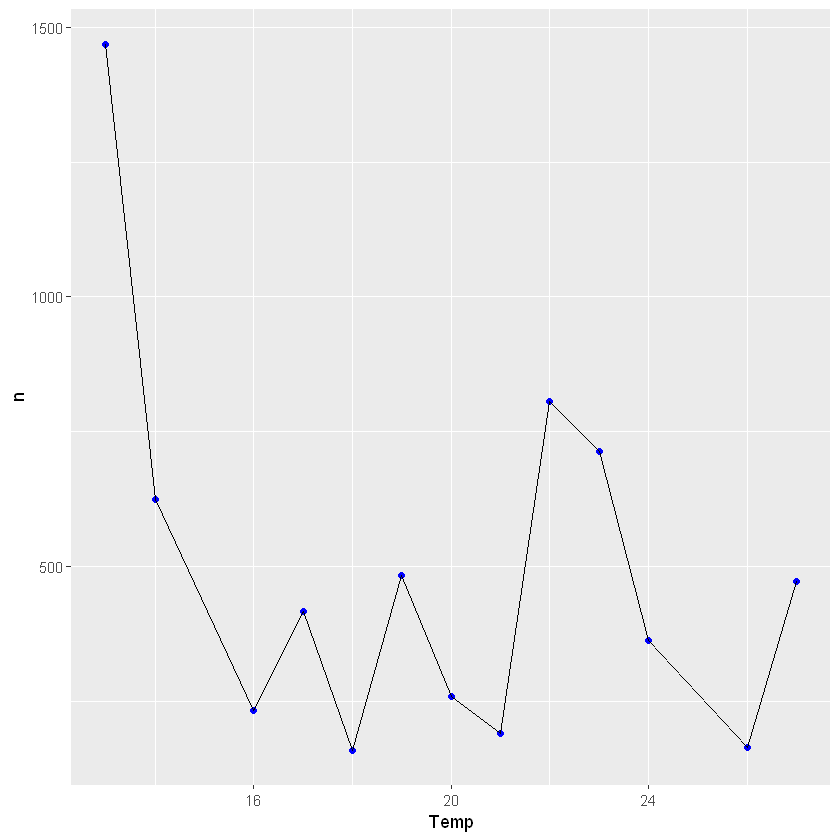

In [46]:
#Ques: Number of trips by temp of the day
M5 <- M3 %>% count(Temp)
M5 %>% ggplot(aes(x = Temp, y = n)) + geom_point(color = "blue") + geom_line() #Most rides happenned in early morning and late nights

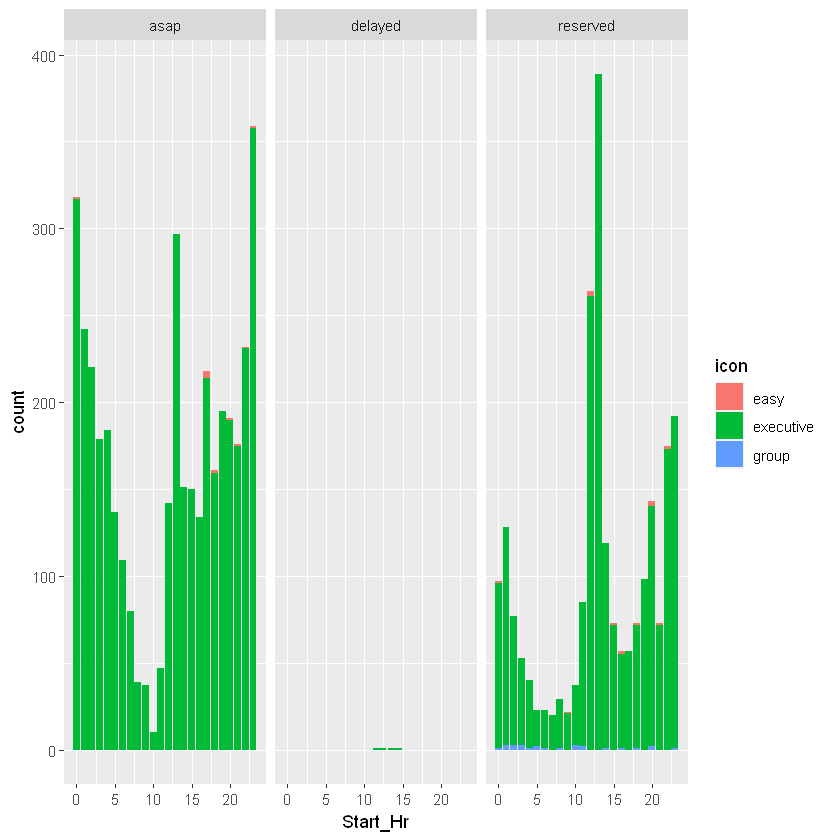

In [47]:
#Question: Number of trips by hour of the day by icon and start_type
ggplot(M3, aes(Start_Hr)) + geom_bar(aes(fill = icon)) + facet_wrap(~start_type) #Majority of executive rides are asap